In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sys.path.append("C:/Users/jakob/Documents/MLandData/OtherFiles")
import Alexandria as lib
alpha = 0.9
beta = 0.2
gamma = 0.1

lambdas = [1,5]


n = 10
T = 100

Gamma = np.array([1-gamma,0,gamma,0,1-gamma,gamma,beta/2,beta/2,1-beta]).reshape((3,3))


def PZ1(c):
    if c == 0:
        return 1 - alpha
    if c == 1:
        return alpha
    if c == 2:
        return 0.5


In [2]:
def simulate(n,T,C0 = 0):
    C = np.empty(T,dtype = int)
    z = np.empty((T,n),dtype = int)
    x = np.empty((T,n))

    for t in range(T):

        C[t] = np.random.choice([0,1,2],p = Gamma[C[t-1],:]) if t > 0 else C0

        z[t] = np.random.random(n) < PZ1(C[t])

        x[t] = np.random.poisson([lambdas[k] for k in  z[t]]) 

        
    return (C,z,x)

Plot generated data

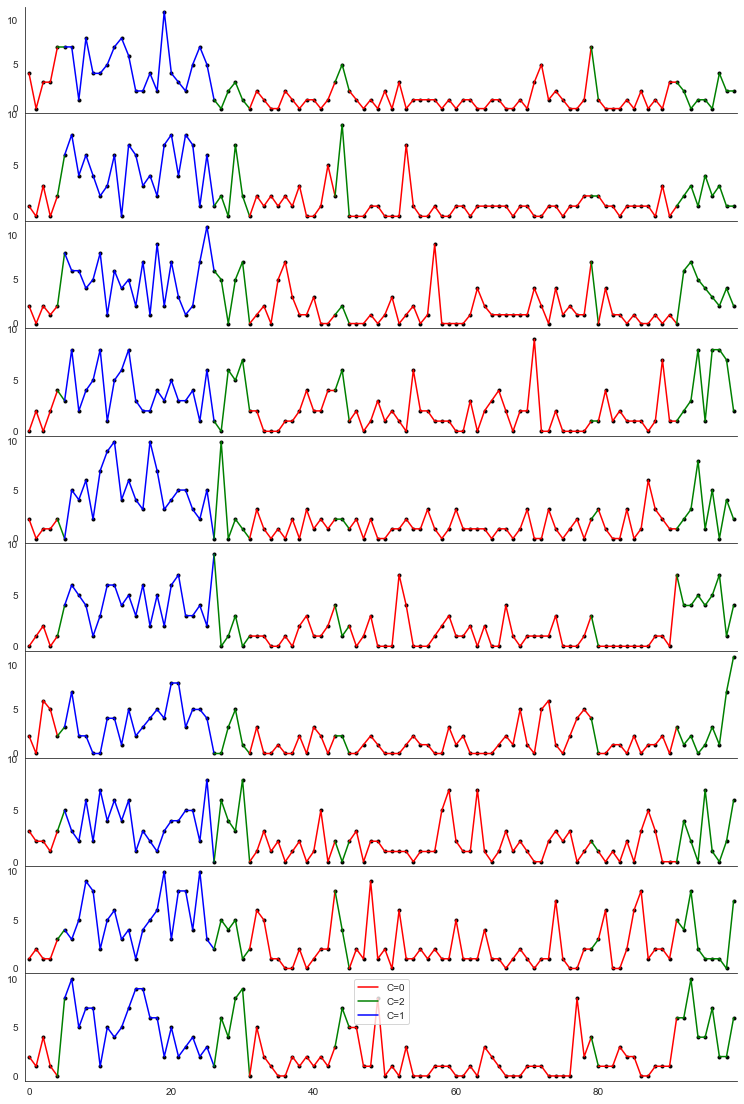

In [3]:
sns.set_style("white")

C, z, x = simulate(n,T,0)


fig, axs = plt.subplots(n,1,figsize = (10,15),sharex=True)

x_split = [x[C == i] for i in range(3)]
x_axis_split = [np.array([xx for xx in range(len(C))])[C == i] for i in range(3)]

for nn in range(n):
    # axs[nn].plot(x[:,nn],alpha = 0.5)
    axs[nn].plot(x[:,nn],'.',color= "black")
    cc = C[0]
    lt = 0
    made = np.zeros(3).astype(bool)
    for t in range(1,T):
        if cc != C[t]:
            if not made[cc]:
                made[cc] = True
                axs[nn].plot([i for i in range(lt,t+1)], x[lt:t+1,nn],color =['red','blue','green'][cc], label = f"C={cc}")

            else:
                axs[nn].plot([i for i in range(lt,t+1)], x[lt:t+1,nn],color =['red','blue','green'][cc] )
            cc = C[t]
            lt = t
    axs[nn].plot([i for i in range(lt,t+1)], x[lt:t+1,nn],color =['red','blue','green'][cc] )

    axs[nn].set_xlim(0-0.5,T-0.5)
    axs[nn].set_yticks([0,5,10])

sns.despine()
plt.legend()
plt.tight_layout(pad = -0.499)
plt.show()

In [109]:
C, z, X = simulate(30,2*2*50000,0)


clf = LogisticRegression().fit(X,C)




No handles with labels found to put in legend.


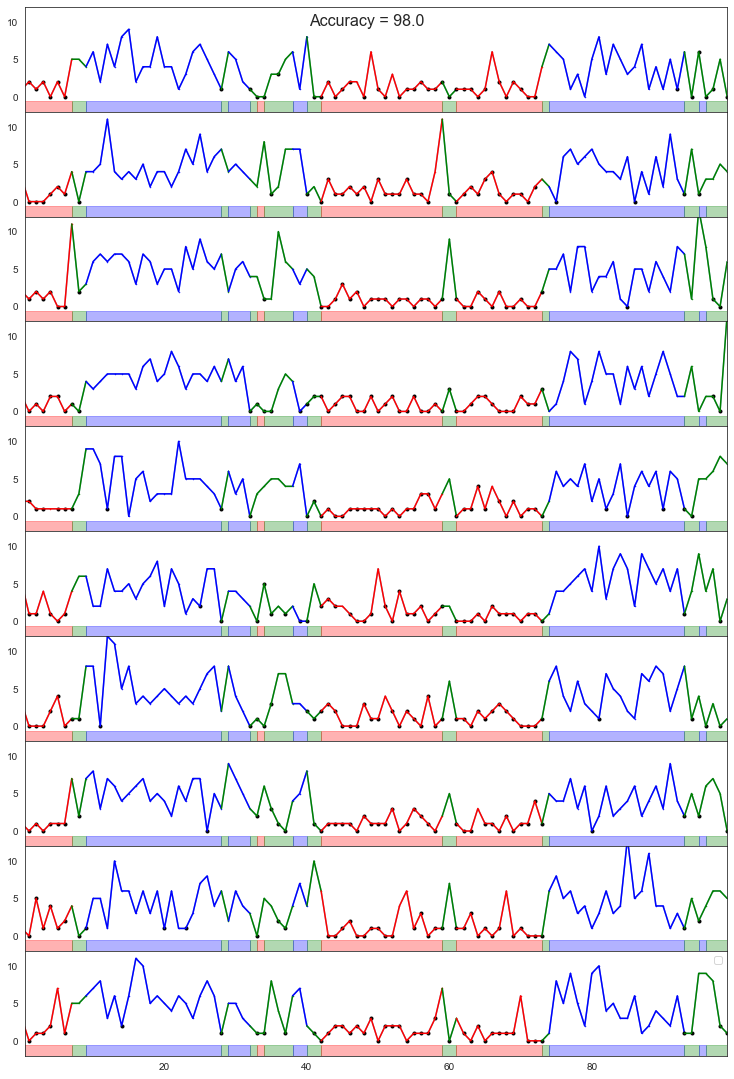

In [153]:
# T = 100

# C, z, x = simulate(30,T,0)

# C_pred = clf.predict(x)

fig, axs = plt.subplots(n,1,figsize = (10,15),sharex=True)

x_split = [x[C == i] for i in range(3)]
x_axis_split = [np.array([xx for xx in range(len(C))])[C == i] for i in range(3)]

p = 0.1

for nn in range(n):
    axs[nn].plot(x[:,nn],alpha = 0.5)
    cc = C[0]
    cc_pred = C_pred[0]
    lt = 0
    lt_pred = 0

    for t in range(1,T):
        axs[nn].plot([t],x[t,nn],'.',color=['red','blue','green'][cc], markersize = 1)
        if cc != C[t]:
            xxx = [i for i in range(lt,t+1)]

            if not made[cc]:
                made[cc] = True
                axs[nn].plot(xxx, x[lt:t+1,nn],color =['red','blue','green'][cc], label = f"C={cc}")

            else:
                axs[nn].plot(xxx, x[lt:t+1,nn],color =['red','blue','green'][cc] )
            cc = C[t]
            lt = t

        if cc_pred != C_pred[t]:
            axs[nn].axvspan(lt_pred, t, ymin = 0, ymax = p,alpha=0.3, color=['red','blue','green'][cc_pred])
            # axs[nn].axvspan(lt_pred+0.5, t+0.5, ymin = 0, ymax = 1,alpha=0.05, color=['red','blue','green'][cc_pred])
            # axs[nn].fill_between([i for i in range(lt_pred,t+1)],x[lt_pred:t+1,nn],color = ['red','blue','green'][cc_pred],alpha = 0.2)
            cc_pred = C_pred[t]
            lt_pred = t
        axs[nn].plot([t],x[t,nn],'.',color='black', alpha = [1,0][z[t,nn]])

    # axs[nn].plot([i for i in range(lt,t+1)],x[lt:t+1,nn],'.',color=['red','blue','green'][cc])
    axs[nn].plot([i for i in range(lt,t+1)], x[lt:t+1,nn],color =['red','blue','green'][cc], markersize = 13)
    axs[nn].axvspan(lt_pred,T, ymin = 0, ymax = p, alpha=0.3, color=['blue','red','green'][cc_pred])


    axs[nn].set_xlim(0+0.5,T-1)
    axs[nn].set_ylim(-2,12)

    axs[nn].set_yticks([0,5,10])

plt.legend()
fig.suptitle(f"Accuracy = {np.mean(C_pred == C)*100}",fontsize=16)
plt.tight_layout(pad = 0)
plt.show()

Learning of the parameters:

In [105]:
n = 10
T = 10000

C, z, X = simulate(n,T,0)


lambda0 = np.mean(X[z==0])
lambda1 = np.mean(X[z==1])

alpha = len(C[C==0])/len(C[C==1])

C20 = sum((C==2)[:-1] * (C==0)[1:])
C21 = sum((C==2)[:-1] * (C==1)[1:])

C02 = sum((C==0)[:-1] * (C==2)[1:])
C12 = sum((C==1)[:-1] * (C==2)[1:])

C22 = sum((C==2)[:-1] * (C==2)[1:])


C2 = C02 + C12 + C22

gamma0 = C02/C2
gamma1 = C12/C2

beta2 = 1 - C22/C2

print("Gamma:",gamma,"Gamma guess:",np.mean(gamma0 + gamma1)/2)

print("Beta:",beta,"Beta guess:", beta2)


Gamma: 0.1 Gamma guess: 0.09916987844648681
Beta: 0.2 Beta guess: 0.19833975689297356


Hard Assignment:

In [ ]:
for it in range(100):
    Z = 